In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir('D:/DIR')

In [3]:
data = pd.read_csv('Project/Project -3 Wheat Export/Wheat Export.csv')

In [4]:
data.head()

,Sales of Wheat in tons,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [5]:
data.isnull().sum()

Sales of Wheat in tons    0
1990                      0
1991                      0
1992                      0
1993                      0
1994                      0
1995                      0
1996                      0
1997                      0
1998                      0
1999                      0
2000                      0
2001                      0
2002                      0
2003                      0
2004                      0
2005                      0
2006                      0
2007                      0
dtype: int64

In [6]:
data = pd.read_csv('Project/Project -3 Wheat Export/Wheat Export.csv',index_col=0, thousands=",")

In [7]:
data.index.names = ['Country']
data.columns.names = ['Years']

In [8]:
data.describe()

Years,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,196.966184,196.468599,192.811594,191.173913,188.724638,187.942029,178.898551,180.975845,178.120773,180.473430,177.521739,177.797101,179.516908,176.405797,173.922705,171.183575,169.019324,167.256039
std,232.385067,229.329664,224.805522,220.093799,216.750218,212.477587,193.786752,192.272421,188.843079,195.062942,199.438504,205.102644,205.321624,210.272545,210.486938,211.218437,211.057714,212.246576
min,0.000000,3.000000,3.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,40.000000,37.500000,37.000000,34.000000,32.500000,31.500000,29.500000,29.000000,28.000000,21.500000,22.500000,24.500000,20.500000,21.000000,19.500000,18.000000,19.000000
50%,96.000000,93.000000,91.000000,88.000000,89.000000,92.000000,88.000000,93.000000,90.000000,90.000000,85.000000,80.000000,79.000000,71.000000,71.000000,66.000000,65.000000,65.000000
75%,290.000000,315.500000,320.000000,316.500000,314.000000,310.500000,306.500000,320.500000,323.000000,345.500000,319.500000,309.000000,306.000000,297.500000,287.500000,282.500000,277.500000,278.000000
max,1485.000000,1477.000000,1463.000000,1442.000000,1414.000000,1381.000000,910.000000,853.000000,777.000000,770.000000,761.000000,832.000000,932.000000,960.000000,1034.000000,1046.000000,1093.000000,1104.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1990    207 non-null    int64
 1   1991    207 non-null    int64
 2   1992    207 non-null    int64
 3   1993    207 non-null    int64
 4   1994    207 non-null    int64
 5   1995    207 non-null    int64
 6   1996    207 non-null    int64
 7   1997    207 non-null    int64
 8   1998    207 non-null    int64
 9   1999    207 non-null    int64
 10  2000    207 non-null    int64
 11  2001    207 non-null    int64
 12  2002    207 non-null    int64
 13  2003    207 non-null    int64
 14  2004    207 non-null    int64
 15  2005    207 non-null    int64
 16  2006    207 non-null    int64
 17  2007    207 non-null    int64
dtypes: int64(18)
memory usage: 30.7+ KB


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [11]:
scal = StandardScaler()
x = scal.fit_transform(data)
scaldata = pd.DataFrame(x)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(0.95)

In [13]:
pca.fit(scaldata)

PCA(n_components=0.95)

In [14]:
x = pca.transform(scaldata)

In [15]:
x = pd.DataFrame(x)

In [123]:
x.index = data.index
x.columns = ['pcl1','pcl2']


In [16]:
wcss = []
for i in range(1,21):
    kmean = KMeans(n_clusters=i, init = 'k-means++')
    kmean.fit(x)
    wcss.append(kmean.inertia_)
wcss

[3641.966555746663,
 927.1243171671325,
 551.956791265397,
 429.3482312069801,
 331.72458124149813,
 257.45728292003724,
 211.84330968779872,
 174.11303019373784,
 141.05646470992207,
 120.92802933115476,
 106.19586987827215,
 96.66908450256095,
 88.06996214536578,
 79.10734591258162,
 70.50454016649539,
 63.17737302213018,
 58.01984863488118,
 52.81013323752359,
 49.039624008256474,
 44.52386570087093]

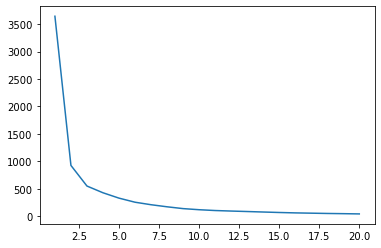

In [17]:
b = range(1,21)
plt.plot(b,wcss)

In [145]:
kmean = KMeans(n_clusters=3, init='k-means++',random_state=5)
kmean = kmean.fit(x)
yk = kmean.predict(x)
yk

array([2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 0, 1, 1,
       1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 0, 2])

In [134]:
a = x.iloc[:,[0,1]].values

In [20]:
data['clusters'] = yk
data

Years,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,clusters
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238,2
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22,1
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56,1
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5,1
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis et Futuna,126,352,64,174,172,93,123,213,107,105,103,13,275,147,63,57,60,25,1
West Bank and Gaza,55,54,54,52,52,50,49,46,44,42,40,39,37,36,35,33,32,31,1
Yemen,265,261,263,253,250,244,233,207,194,175,164,154,149,146,138,137,135,130,1


In [ ]:
x['clusters'] = yk

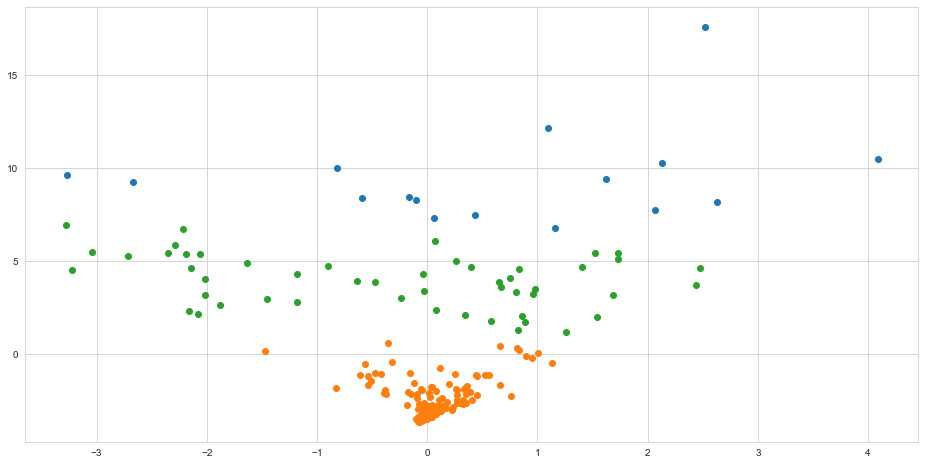

In [146]:
plt.figure(figsize=(16,8))
u_labels = np.unique(yk)
centroids = kmean.cluster_centers_
for i in u_labels:
    plt.scatter(a[yk == i,1], a[yk == i,0])

C:\Users\sreen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


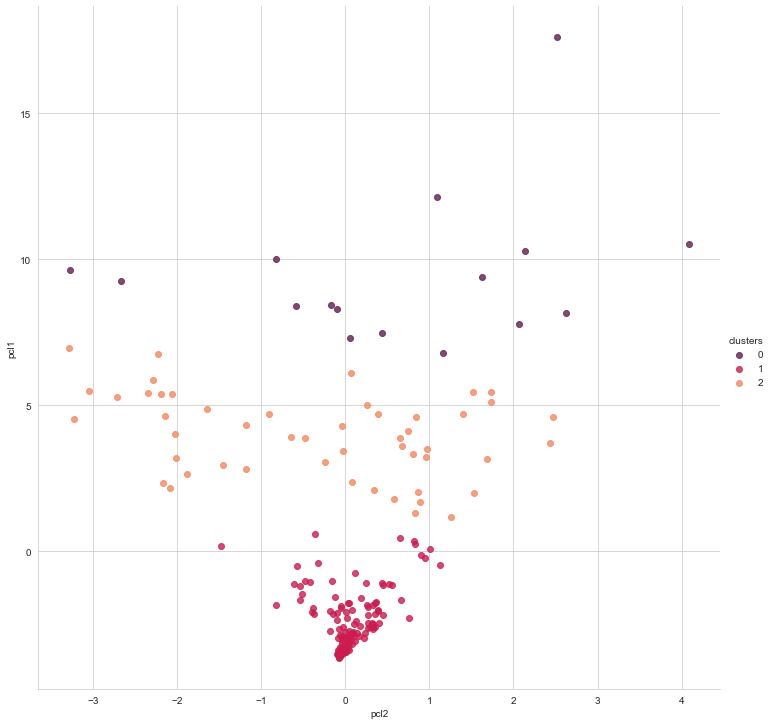

In [155]:
sns.set_style('whitegrid')
sns.lmplot('pcl2', 'pcl1',data=x, hue='clusters',
           palette='rocket',height=10,aspect=1,fit_reg=False)

# Hierarchical Clustering.

In [157]:
x1 = x.drop(['clusters'],axis=1)

In [169]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hcw = hc.fit_predict(x1)
y_hcw

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1,
       1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 2, 0], dtype=int64)

# Only ward method populates clustering similar to kmeans. 

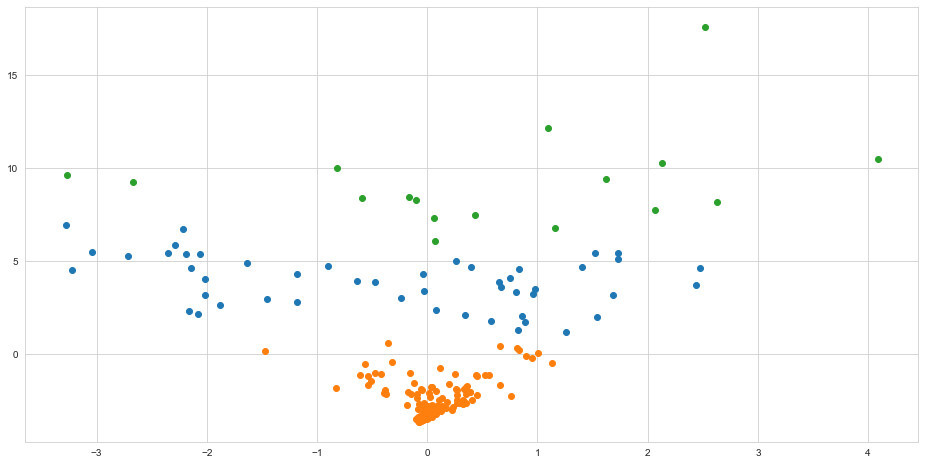

In [177]:

plt.figure(figsize=(16,8))
u_labels = np.unique(y_hcw)
centroids = kmean.cluster_centers_
for i in u_labels:
    plt.scatter(a[y_hcw == i,1], a[y_hcw == i,0])